In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


C:\Users\Anton\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(9.701510416666672, 0.5, 'total')

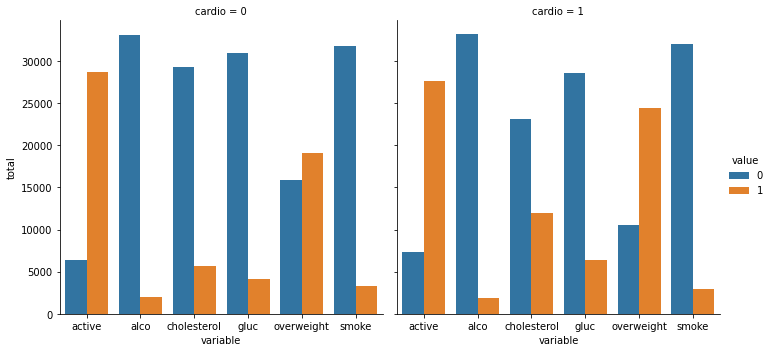

In [6]:
df = pd.read_csv("data/medical_examination.csv")
overweight = [0] * len(df)
for i in range(len(df)):
    if (df.iloc[i].weight / (df.iloc[i].height / 100) ** 2) > 25:
        overweight[i] = 1
    elif (df.iloc[i].weight / (df.iloc[i].height / 100) ** 2) < 25:
        overweight[i] = 0
df["overweight"] = overweight
df.loc[df["cholesterol"] == 1, "cholesterol"] = 0      
df.loc[df['cholesterol'] > 1, "cholesterol"] = 1
df.loc[df["gluc"] == 1,"gluc"] = 0      
df.loc[df["gluc"] > 1,"gluc"] = 1

df_cat = pd.melt(df, value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], id_vars="cardio")
g = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")
g.axes[0,0].set_ylabel('total')


(14.5, -0.5)

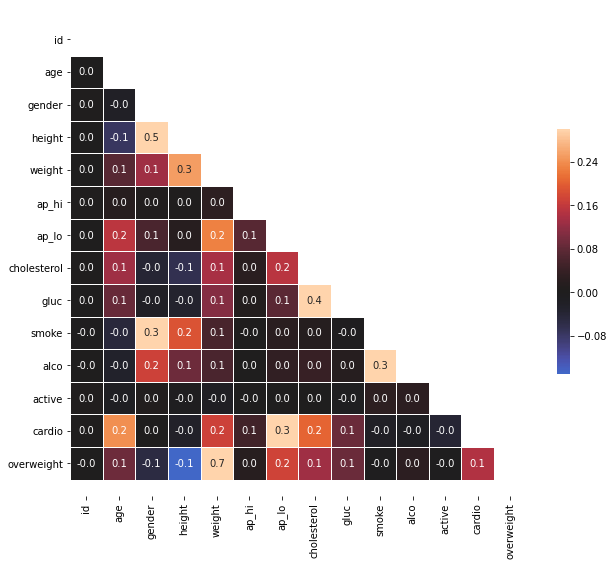

In [5]:
df_sorted_quantiles = df[(df['ap_lo'] <= df['ap_hi']) & 
            (df['height'] >= df['height'].quantile(0.025)) &
            (df['height'] <= df['height'].quantile(0.975)) &
            (df['weight'] >= df['weight'].quantile(0.025)) & 
            (df['weight'] <= df['weight'].quantile(0.975))]

# Calculate the correlation matrix
corr = df_sorted_quantiles.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_sorted_quantiles.corr(), dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask
sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
